# Data and Lib imports
https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

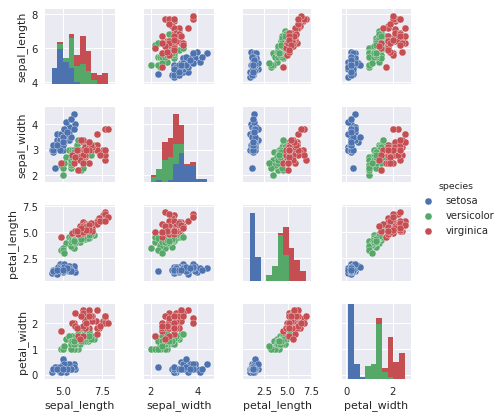

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', size=1.5)

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Basic Linear Regression

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

In [7]:
x[:5]

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ])

In [9]:
y[:5]

array([ 7.22926896, 18.18565441, 13.52423055, 10.67206599,  0.64185082])

In [11]:
x.shape

(50,)

In [12]:
y.shape

(50,)

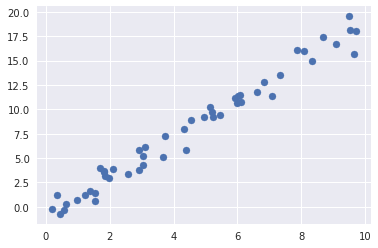

In [13]:
plt.scatter(x,y)

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [21]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Les coefficients: Le a de ax + b
model.coef_

array([1.9776566])

In [25]:
# L'ordonnée à l'origine
model.intercept_

-0.9033107255311146

In [27]:
# Prediction
xfit = np.linspace(-1, 11)

In [28]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [32]:
Xfit = xfit[:, np.newaxis]
Xfit.shape

(50, 1)

In [33]:
# Prediction pour nouvelle matric de données X (50 samples, 1 feature)
yfit = model.predict(Xfit)

In [34]:
yfit.shape

(50,)

In [35]:
yfit[:5]

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106])

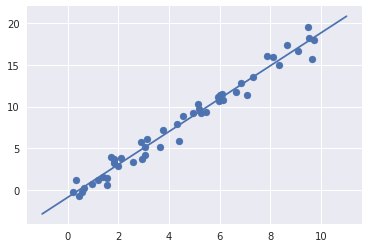

In [36]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

# PCA

In [40]:
X_iris = iris.drop('species', axis=1)
X_iris[:5]

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [43]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

In [53]:
model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [54]:
pd.DataFrame(X_2D).head(5)

0         1
0 -2.684126  0.319397
1 -2.714142 -0.177001
2 -2.888991 -0.144949
3 -2.745343 -0.318299
4 -2.728717  0.326755

In [56]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris.head()

sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  
0  0.319397  
1 -0.177001  
2 -0.144949  
3 -0.318299  
4  0.326755

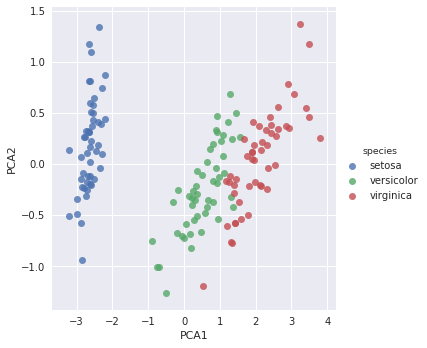

In [58]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

# Application: Exploring Hand-written Digits

In [61]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

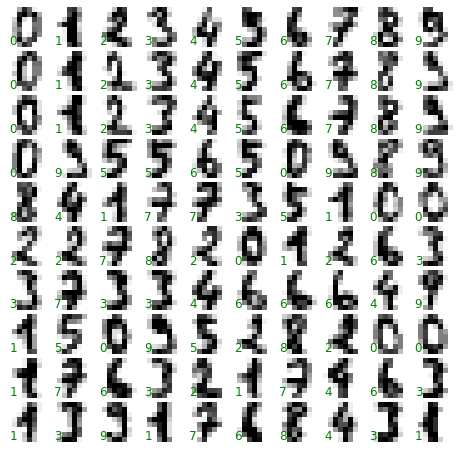

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [64]:
X = digits.data
X.shape

(1797, 64)

In [65]:
y = digits.target
y.shape

(1797,)

In [66]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

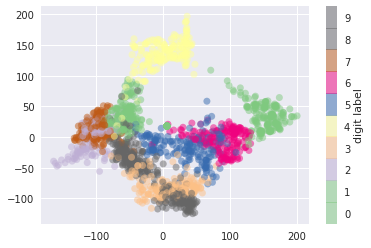

In [68]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [70]:
Xtrain.shape

(1347, 64)

In [71]:
Xtest.shape

(450, 64)

In [72]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(91.68,0.5,'true value')

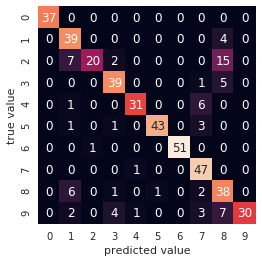

In [74]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

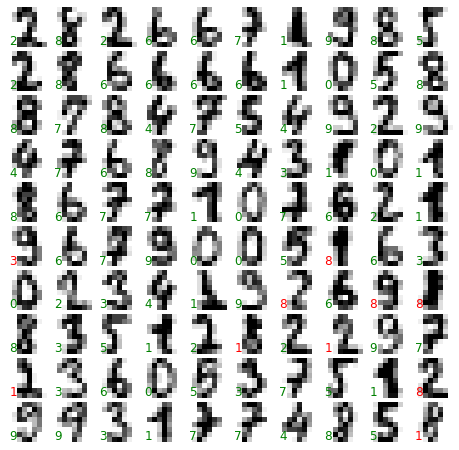

In [75]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')